In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Spring position and velocity vs. time')

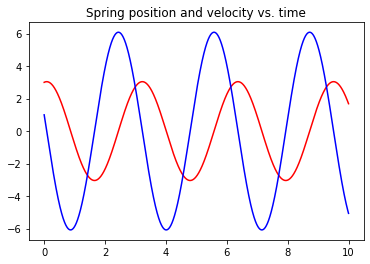

In [2]:
from scipy.integrate import odeint  #the differential equation integrator
# To reduce demand on memory, we import only a subset of the scipy package
k = 8.0
m = 2.0 
w= sqrt(k/m)
#optional damping parameter, such that the damping force is -(gamma_damp)*v
gamma_damp = 0.00


#Create the time array for the solution.  Just 10 seconds will be enough to illustrate the technique for now
delta_t = 0.001   #time step of integration
tend = 10
t = arange(0.0,tend,delta_t)

# Set the initial conditions
x_0 = 3.0
v_0 = 1.0



x_analytical = (x_0)*cos(w*t)   + (1/w)*sin(w*t)      
dxdt = -(x_0*w)*sin(w*t) + cos(w*t)


plt.figure(1)
plt.plot(t,x_analytical, color='red')
plt.plot(t,dxdt, color='blue')
title("Spring position and velocity vs. time")

Text(0.5, 1.0, 'Spring position and velocity vs. time (numerical)')

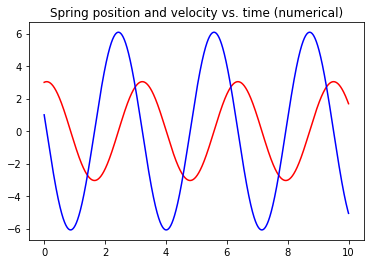

In [3]:
# <Exercise 5.2 numerical solution to SHO without damping>
from scipy.integrate import odeint  #the differential equation integrator  For usage, see scipy scipy.integrate
import numpy as np

#global variables
k = 8.0
m = 2.0
omega0 = 2.0  #fix

def deriv(r,t): 
    #unpack the variables
    x = r[0]
    v = r[1]
    #perform the derivatives
    dxdt = v  #fix
    dvdt = -x*(omega0)**2  #fixed?
    return array([dxdt,dvdt],float)

# t = np.linspace(0.0,10.0,0.1) #fix 
t = arange(0.0,10.0,0.001)

x0 = 3 
v0 = 1 
rinit = np.array([x0,v0])     #The two-element list that gives the initial position and velocity
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11)  #to maintain reasonable accuracy, we need
                                                    #to tighten these tolerances (compare error if 
                                                    #you omit these keywords)  If you are patient, you
                                                    #could set these to 1E-13 to reduce the residual
#### YOUR PLOT CODE HERE 
plt.figure(1)
plt.plot(t,r[:,0], color='red')
plt.plot(t,r[:,1], color='blue')
title("Spring position and velocity vs. time (numerical)")

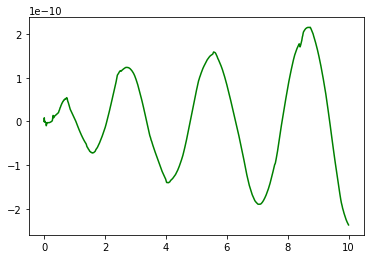

In [4]:
x_residual = r[:,0]-x_analytical
#this gives the error between exact, analytical solution and the numerical ODE
plt.figure(1)
plot(t, x_residual, color ='green')

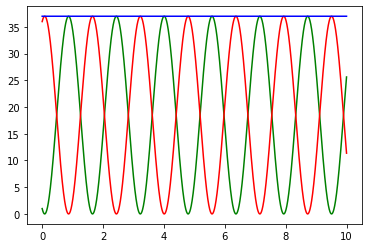

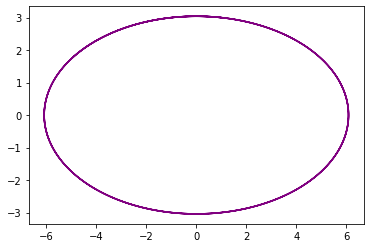

In [5]:
# Energy Observation

KE = 0.5*m*(r[:,1])**2
PE = 0.5*k*(r[:,0])**2
TE = KE + PE

#Plot Energy
plt.figure()
plot(t, KE, color='green')
plot(t, PE, color='red')
plot(t, TE, color='blue')

figure(2)
plot(r[:,1],r[:,0],color='purple')

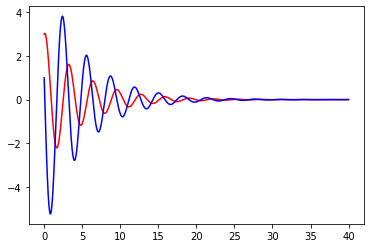

In [11]:
# <Exercise 5.6 No damping> 

#### Edit the code below

def deriv(r,t,param): 
    #unpack the parameters (in this case, just the damping parameter)
    beta = param[0]
    #unpack the variables
    x = r[0]
    v = r[1]
    #perform the derivatives
    dxdt = v  #fix
    dvdt = -x*(omega0)**2 - 2*beta*v  #fixed?
    
    return array([dxdt,dvdt],float)

t = arange(0.0,40.0,0.004)
beta = 0.10*omega0 # The damping parameter. In later exercises, you will change this value
param = np.array([beta]) # Same the damping parameter into the param array so that it can be passed to the deriv 
                            # function through odeint
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args=(param,)) # Including the param array in the arguments we pass
                                                                # to odeint

#### CODE TO PLOT x(t) AND v(t) HERE
plt.figure()
plot(t, r[:,0],color='red')
plot(t, r[:,1],color='blue')

#### CODE TO SAVE SOLUTION HERE
undamped_xsolution = r[:,0]